In [114]:
import csv

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator

RANDOM_SEED = 42

# Specify each path

In [115]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [116]:
NUM_CLASSES = 26

# Dataset reading

In [117]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [118]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [120]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])
# Define the model with Conv2D layers
# Define the model with Conv2D layers
# Define the model with Conv2D layers
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    # Reshape the input to simulate an "image-like" structure
    tf.keras.layers.Input((21 * 2,)),
    tf.keras.layers.Reshape((21, 2, 1)),  # Reshape to a 2D "image" with 1 channel
    
    # First Conv and Pooling block
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 1)),  # Compatible pooling size for (21, 2)
    Dropout(0.2),

    # Second Conv and Pooling block
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 1)),  # Again, compatible size for the reduced dimension
    Dropout(0.2),
    
    # Third Conv and Pooling block
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    Dropout(0.2),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Model summary
model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 21, 2, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 21, 2, 128)     │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 10, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 2, 64)      │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 5, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,570 (564.73 KB)

 Trainable params: 144,570 (564.73 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 21, 2, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 21, 2, 128)     │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 10, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 2, 64)      │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 5, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,570 (564.73 KB)

 Trainable params: 144,570 (564.73 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [123]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [124]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1161 - loss: 2.9345
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1169 - loss: 2.9313 - val_accuracy: 0.5678 - val_loss: 1.3405
Epoch 2/1000
138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4721 - loss: 1.4852
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4729 - loss: 1.4830 - val_accuracy: 0.7344 - val_loss: 0.8120
Epoch 3/1000
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6007 - loss: 1.0694
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6010 - loss: 1.0689 - val_accuracy: 0.8083 - val_loss: 0.5964
Epoch 4/1000
134/139 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6983 - loss: 0.8247
Epoch 4: saving model to model/keypoint_classifier/keypoint_c

In [125]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9837 - loss: 0.0519


In [126]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [127]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[1.2000776e-12 1.5174138e-15 3.1148193e-08 2.2653000e-15 2.1710201e-13
 2.0446112e-12 2.2357586e-08 8.7774758e-13 4.1311340e-16 2.0673861e-13
 5.5996366e-12 9.3963895e-16 2.5962711e-20 7.6583935e-20 2.3515163e-08
 2.8833283e-14 7.0030750e-09 2.2374559e-12 1.0000000e+00 1.1255582e-14
 2.6120325e-23 1.5370211e-18 4.0342471e-18 3.8892974e-08 2.1738384e-20
 1.2621429e-15]
18


# Confusion matrix

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


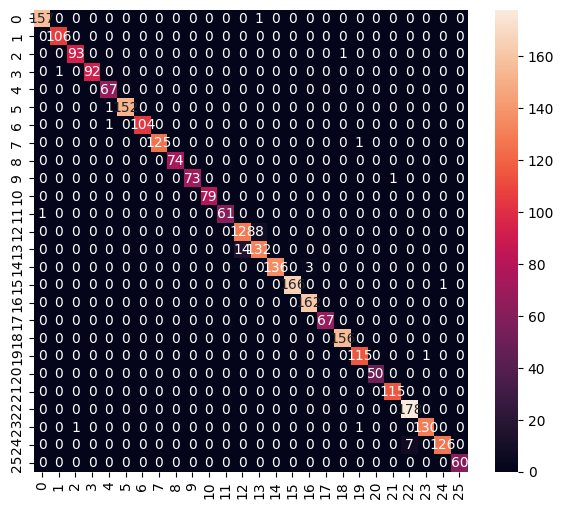

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.99      1.00      1.00       106
           2       0.99      0.99      0.99        94
           3       1.00      0.99      0.99        93
           4       0.97      1.00      0.99        67
           5       1.00      0.99      1.00       153
           6       1.00      0.99      1.00       105
           7       1.00      0.99      1.00       126
           8       1.00      1.00      1.00        74
           9       1.00      0.99      0.99        74
          10       1.00      1.00      1.00        79
          11       1.00      0.98      0.99        62
          12       0.90      0.94      0.92       136
          13       0.94      0.90      0.92       146
          14       1.00      0.98      0.99       139
          15       1.00      0.99      1.00       167
          16       0.98      1.00      0.99       162
     

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [129]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [130]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\IdeaPad\AppData\Local\Temp\tmpsixm1s4n\assets


INFO:tensorflow:Assets written to: C:\Users\IdeaPad\AppData\Local\Temp\tmpsixm1s4n\assets


Saved artifact at 'C:\Users\IdeaPad\AppData\Local\Temp\tmpsixm1s4n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  1686039681488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686039683984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686039685136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686039682832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686039683024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686039684944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686039683216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686334779280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686334781200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686334780624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1686334782

156576

# Inference test

In [131]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [132]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [133]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [134]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.52 ms


In [135]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1491148e-12 1.4989400e-15 2.9684699e-08 2.4065193e-15 2.3745502e-13
 2.1188812e-12 2.2462002e-08 8.1516293e-13 4.2841944e-16 2.0957609e-13
 5.5815188e-12 9.4430642e-16 2.3370678e-20 7.0922104e-20 2.4934831e-08
 2.9393551e-14 7.3158186e-09 2.3988470e-12 9.9999988e-01 1.0597707e-14
 2.2690779e-23 1.4971719e-18 3.7610769e-18 4.4467178e-08 2.1858118e-20
 1.2386895e-15]
18
